In [7]:
import numpy as np
from matplotlib import pyplot as plt, cm
from solver import *

lx = 5      #length in the x direction
ly = 5     #length in the y direction
nx = 101     #grid points in x direction
ny = 101     #grid points in y direction
t = 10       #final time to calculate to
#nit = 10    #pseudo-time steps in each timestep
dx = lx / (nx - 1)
dy = ly / (ny - 1)
x = np.linspace(0, lx, nx)
y = np.linspace(0, ly, ny)
X, Y = np.meshgrid(x, y)

rho = 1
Re = 1
dt = .001 #time step size

nt=int(t/dt)
ds=int(100)

u = np.zeros((ny, nx)) #initial conditions 
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 
#b = np.zeros((ny, nx))

In [8]:
u = np.zeros((ny, nx)) #comment out these lines if you want to run from last time step
v = np.zeros((ny, nx))
p = np.zeros((ny, nx))

vel_mag=(u**2+v**2)**0.5

np.savetxt('p0.csv', p, delimiter=',')
np.savetxt('u0.csv', u, delimiter=',')
np.savetxt('v0.csv', v, delimiter=',')
np.savetxt('Umag0.csv', vel_mag, delimiter=',')

#PRESSURE
pLeft=['N',0]
pRight=['N',0]
pTop=['D',0]
pBottom=['N',0]

pBCs=[pLeft,pRight,pTop,pBottom]
#pressureBC(pLeft,pRight,pTop,pBottom,p,dx,dy)

#VELOCITY

#x-component
uLeft=['D',0]
uRight=['D',0]
uTop=['D',10]
uBottom=['D',0]

uBCs=[uLeft,uRight,uTop,uBottom]
#XVelBC(uLeft,uRight,uTop,uBottom,u,dx,dy)

#y-component
vLeft=['D',0]
vRight=['D',0]
vTop=['D',0]
vBottom=['D',0]

#YVelBC(vLeft,vRight,vTop,vBottom,v,dx,dy)
vBCs=[vLeft,vRight,vTop,vBottom]

# solving
u, v, p = flow_solver(nt, u, v, dt, ds, dx, dy, p, rho, Re, pBCs,uBCs,vBCs)


Step 0, dt: 3.12500e-04, max U: 0.000, max V: 0.000
Step 1, dt: 3.12500e-04, max U: 10.000, max V: 0.000
Step 2, dt: 3.12500e-04, max U: 10.000, max V: 0.000
Step 3, dt: 3.12500e-04, max U: 10.000, max V: 0.049
Step 4, dt: 3.12500e-04, max U: 10.000, max V: 0.103
Step 5, dt: 3.12500e-04, max U: 10.000, max V: 0.167
Step 6, dt: 3.12500e-04, max U: 10.000, max V: 0.230
Step 7, dt: 3.12500e-04, max U: 10.000, max V: 0.291
Step 8, dt: 3.12500e-04, max U: 10.000, max V: 0.348
Step 9, dt: 3.12500e-04, max U: 10.000, max V: 0.400
Step 10, dt: 3.12500e-04, max U: 10.000, max V: 0.448
Step 11, dt: 3.12500e-04, max U: 10.000, max V: 0.492
Step 12, dt: 3.12500e-04, max U: 10.000, max V: 0.532
Step 13, dt: 3.12500e-04, max U: 10.000, max V: 0.569
Step 14, dt: 3.12500e-04, max U: 10.000, max V: 0.602
Step 15, dt: 3.12500e-04, max U: 10.000, max V: 0.635
Step 16, dt: 3.12500e-04, max U: 10.000, max V: 0.669
Step 17, dt: 3.12500e-04, max U: 10.000, max V: 0.700
Step 18, dt: 3.12500e-04, max U: 10.000

In [9]:
clearResults()

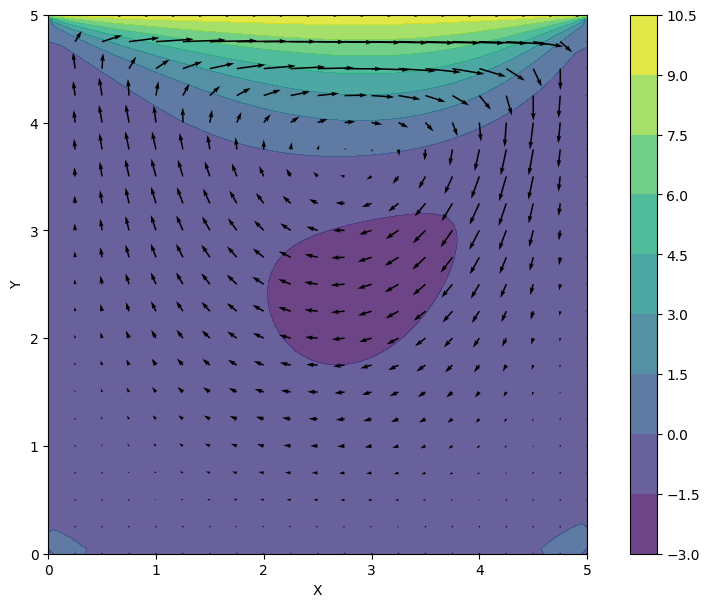

In [10]:
fig = plt.figure(figsize=(11,7),dpi=100)
# plotting the pressure field as a contour
plt.contourf(X, Y, u, alpha=0.8, cmap=cm.viridis)  
plt.colorbar()
## plotting the pressure field outlines
#plt.contour(X, Y, p, cmap=cm.viridis)  
## plotting velocity field
plt.quiver(X[::lx, ::ly], Y[::lx, ::ly], u[::lx, ::ly], v[::lx, ::ly]) 
plt.xlabel('X')
plt.ylabel('Y')
ax = plt.gca()
ax.set_aspect(1)
plt.show()

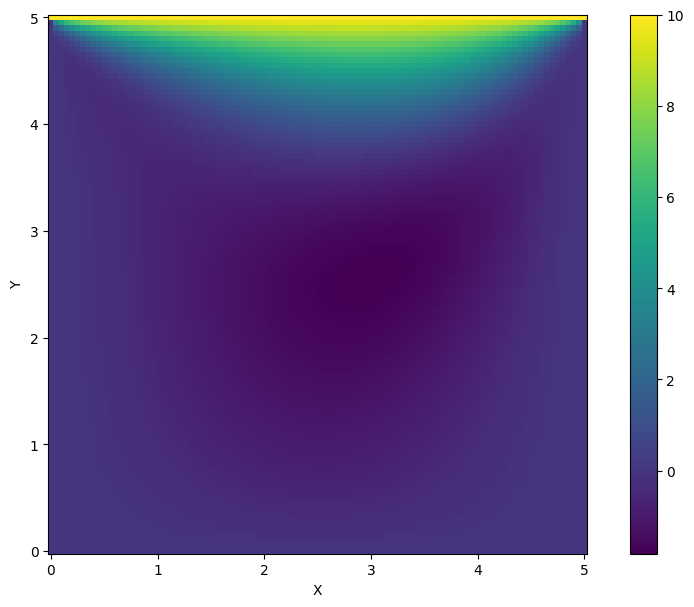

In [11]:
fig = plt.figure(figsize=(11,7),dpi=100)
# plotting the pressure field as a contour
#plt.contourf(X, Y, u, alpha=0.8, cmap=cm.viridis)
## plotting the pressure field outlines
plt.pcolormesh(X, Y, u, alpha=1, cmap=cm.viridis)
plt.colorbar()
## plotting velocity field
#plt.streamplot(X[::lx, ::2*ly], Y[::lx, ::2*ly], u[::lx, ::2*ly], v[::lx, ::2*ly])
plt.xlabel('X')
plt.ylabel('Y')
ax = plt.gca()
ax.set_aspect(1)
plt.show()

In [12]:
import pandas as pd
import matplotlib.animation as animation

fig, ax = plt.subplots(dpi=100)
#levels=np.linspace(0,1.5,10)
def animate(i):
    tmpName='Umag'+str(i*ds)+'.csv'
    Tfile=pd.read_csv(r"Results/"+str(tmpName),header=None)
    Tarr=Tfile.to_numpy()
    # plotting the temperature field
    re = plt.contourf(X, Y, Tarr, 20, alpha=0.8, cmap=cm.viridis)
    #plt.xlabel('X')
    #plt.ylabel('Y')
    ax = plt.gca()
    ax.set_aspect(1)
    return re

anim = animation.FuncAnimation(fig, animate, frames=nt//ds, repeat=False)
anim.save(r'Gifs/cavity_Umag.gif', writer='imagemagick', fps=10)


ModuleNotFoundError: No module named 'pandas'